In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import itertools

# phase diagram 

In [298]:
#p1 = [0,0.05,0.07,0.1,0.15,0.2,0.25]
#p2 = [0,0.1,0.3,0.5,0.7,0.9,1]

p1 = [0]
p2=[0]
p1 = [0.01,0.03,0.05,0.07,0.1,0.15,0.2,0.25]
#p2 = [0.1,0.3,0.5,0.7,0.9]
#p1=[0.07,0.1]
#p2=[0.1,0.5]
beta_list = np.arange(0,1.05,0.05)

pp = list(itertools.product(p1, p2))

meta_means=[]
meta_error=[]
for p11,p22 in pp:
    means=[]
    error=[]
    for beta in beta_list:
        df=pd.read_csv(f'csv-kamtar/p1={p11:.2f},p2={p22:.2f},beta={beta:.2f}.csv',index_col=0)
        means.append(df['R'].to_numpy()[-1])
        error.append(df['e_R'].to_numpy()[-1])

        #means.append(df['I'].to_numpy())
        #error.append(df['e_I'].to_numpy())
    
    meta_means.append(means)
    meta_error.append(error)

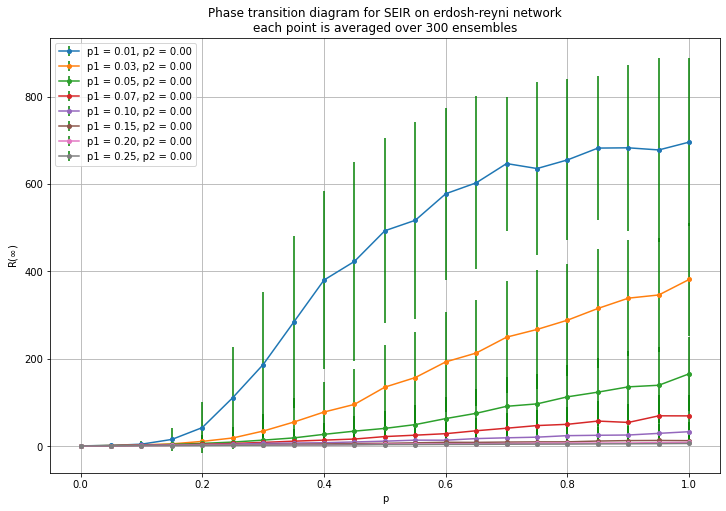

In [299]:
ensembles=300
fig=plt.figure(figsize=(12,8))
for i in range(len(meta_error)):
    plt.errorbar(x=beta_list,y=meta_means[i],yerr=meta_error[i],ms=4,fmt='-o',ecolor='g',label=f'p1 = {pp[i][0]:0.2f}, p2 = {pp[i][1]:0.2f}')


plt.xlabel('p')
plt.ylabel('R($\infty$)')
plt.title('Phase transition diagram for SEIR on erdosh-reyni network\neach point is averaged over %i ensembles'%ensembles)
plt.grid()
plt.legend()
plt.savefig(f'fig-kamtar/p2=0.00-phase-kamtar.pdf',bbox_inches='tight')

# time series plot

In [239]:
def hist_diagram(param_list,error_list,name,p1,p2,beta_list):
    dic = {'I':'infecteds','S':'susceptibles', 'E':'exposed','R':'recovered','V':'vacinated'}
    fig,ax=plt.subplots(figsize=(12,8))
    pp = list(itertools.product(p1, p2)) 
   
    for l,p in enumerate(pp):
        for index,beta in enumerate(beta_list):
            for i in range(len(param_list[l][index])):
                if param_list[l][index][i]==0 and i>5:
                    break

            x=range(1,len(param_list[l][index][:i])+1)
    
            ax.plot(x,param_list[l][index][:i],label=f'p1 ={p[0]:0.2f} , p2 ={p[1]:0.2f}, $\\beta={beta}$')
            ax.fill_between(x, param_list[l][index][:i]-error_list[l][index][:i],  param_list[l][index][:i]+error_list[l][index][:i],alpha=0.2)

    ax.set_xlabel('time')
    ax.set_ylabel(f'{name}(t)')
    ax.set_title(f'average number of {dic[name]} versus time')
    ax.legend()

In [332]:
#p1 = [0,0.05,0.07,0.1,0.15,0.2]
#p2 = [0,0.1,0.3,0.5,0.7,0.9]
#beta_list = np.array([ 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])
beta_list = np.arange(0,1.05,0.05)
beta_list=beta_list[::1]
beta_list=[0.1,0.3,0.5,0.7]
p1 = [0]
p2=[0]
#p1 = [0.01,0.03,0.05,0.07,0.1,0.15,0.2,0.25]
#p2 = [0.1,0.3,0.5,0.7,0.9]

p1=[0.01,0.03,0.05,0.1,0.2]
#p2=[0.5]

#beta_list=[0.3]

pp = list(itertools.product(p1, p2))



vac_beta=[]

meta_means=[]
meta_error=[]
df_list=[]
for p11,p22 in pp:
    means=[]
    error=[]
    for beta in beta_list:
   
    
        df=pd.read_csv(f'csv/p1={p11:.2f},p2={p22:.2f},beta={beta:.2f}.csv',index_col=0)
        df_list.append(df)
        means.append(df['I'].to_numpy())
        error.append(df['e_I'].to_numpy())
        vac_beta.append(df['vac_num'].sum()/1000)
    
    meta_means.append(means)
    meta_error.append(error)


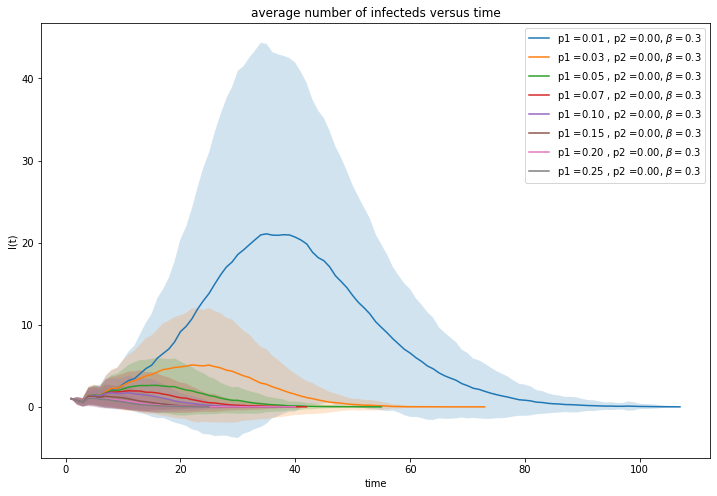

In [303]:
hist_diagram(meta_means,meta_error,'I',p1,p2,beta_list)
plt.savefig(f'fig-kamtar/time-I-p2={p22:.2f}-kamtar.pdf',bbox_inches='tight')

In [333]:
dff=pd.DataFrame(columns=['percentage vaccinated'])
for index,p in enumerate(pp):
    for beta in beta_list:
        dff.loc[f'p1={p[0]},beta={beta:.2f}']=df_list[index]['vac_num'].sum()/1000


In [334]:
dff

,percentage vaccinated
"p1=0.01,beta=0.10",0.269183
"p1=0.01,beta=0.30",0.269183
"p1=0.01,beta=0.50",0.269183
"p1=0.01,beta=0.70",0.269183
"p1=0.03,beta=0.10",0.178720
"p1=0.03,beta=0.30",0.178720
"p1=0.03,beta=0.50",0.178720
"p1=0.03,beta=0.70",0.178720
"p1=0.05,beta=0.10",0.130810
"p1=0.05,beta=0.30",0.130810


In [261]:
time_list=[]
for data in df_list:
    counter=0
    for item1,item2 in zip(data['I'],data['E']):
        if item1==0 and item2==0:
            time_list.append(counter)
            break
        counter+=1
            


# histogram plot

In [61]:
#p1 = [0,0.05,0.07,0.1,0.15,0.2,0.25]
#p2 = [0,0.1,0.3,0.5,0.7,0.9,1]

p1 = [0]
p2=[0]
#p1 = [0,0.05,0.07,0.1,0.15,0.2,0.25]
#p2 = [0,0.1,0.3,0.5,0.7,0.9,1]
beta_list = np.arange(0,1.05,0.05)

pp = list(itertools.product(p1, p2))

meta_means=[]
for p11,p22 in pp:
    means=[]
    for beta in beta_list:
        df=pd.read_csv(f'csv/p1={p11:.2f},p2={p22:.2f},beta={beta:.2f}.csv',index_col=0)
        means.append(df['R'].to_numpy())
    
    meta_means.append(means)

In [ ]:
param=3 #0 to 2 values
with plt.style.context('seaborn-white'):
    fig,ax=plt.subplots(1,4,figsize=(20,5))
    #ax=fig.add_subplot(111)
    for index,item in enumerate(d):
        sns.histplot(d[item][param],ax=ax[index],bins=20,label='p=%0.2f'%item)
        ax[index].legend()
        ax[index].set_xlabel('R($\infty$)')
fig.suptitle('Histograms of R($\infty$) for various values of p for %i ensembles'%en_nubmer)
#plt.savefig('whole hist.pdf',bbox_inches='tight')